## Image Processing 11

Wirapat Prigphet (Gene) 620510618 <br/>
Suppapich Seetasith (Yale) 620510626 <br/>
Pakin Siwatammarat (Pirch) 620510677

### Import Libraries

In [ ]:
import cv2
import click
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

#### Usefulness 




*   Copyright identification
*   User identification or fingerprinting
*   Authenticity determination
*   Automated monitoring
*   Copy protection




### Read an example image



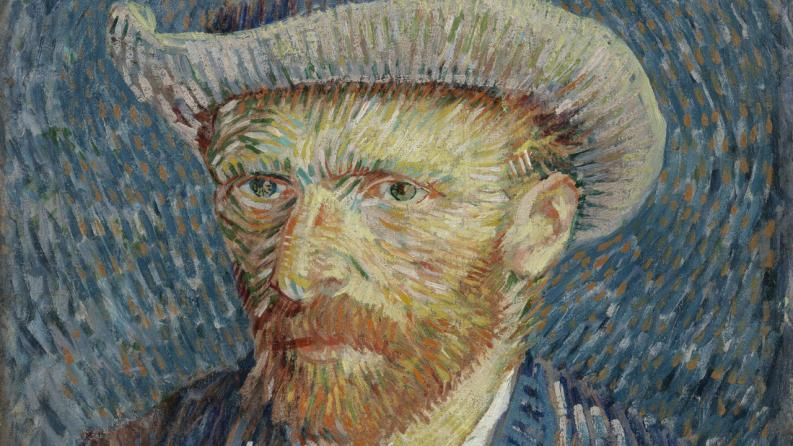

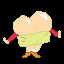

In [ ]:
img = cv2.imread("coolboi.png")
wtm = cv2.imread("shinjung0.png")
cv2_imshow(img)
cv2_imshow(wtm)

###Visible Watermark

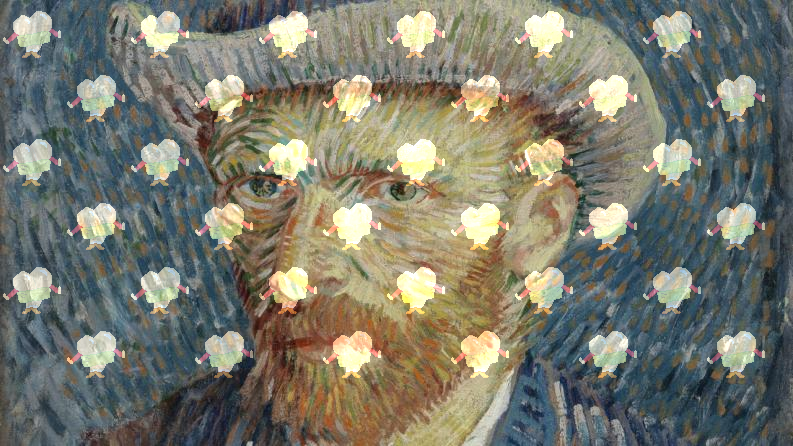

In [ ]:
wtmed_img = img 

#find any image height and width
img_height, img_width, _ = img.shape
wtm_height, wtm_width, _ = wtm.shape

#find area
unit_y = img_height // wtm_height
unit_x = img_width // wtm_width

top_y = -wtm_height
bottom_y = 0
left_x = 0
right_x = wtm_width
check = 0

for i in range(unit_y):
  top_y += wtm_height
  bottom_y += wtm_height
  left_x = 0
  right_x = wtm_width
  for j in range(unit_x):
    if (i % 2 == 0 and j % 2 == 0) or (i % 2 != 0 and j % 2 != 0):
      org_bg_slice = img[top_y:bottom_y, left_x:right_x]
      #print(org_bg_slice.shape, 1, wtm.shape, 0.35, 0)
      result = cv2.addWeighted(org_bg_slice, 1, wtm, 0.5, 0);
      wtmed_img[top_y:bottom_y, left_x:right_x] = result
      # print("top = {}, bottom = {}, left = {}, right = {}, check = {}".format(top_y, bottom_y, left_x, right_x, (check % 2 == 0)))

    left_x += wtm_width
    right_x += wtm_width
    check += 1

cv2_imshow(wtmed_img)

As result, we can see that original image has some watermark which we can visible easily but they are not claer as original watermark at first. they are harmonius

### Invisible Watermark

In [ ]:
def merge(img1, img2):

    # Check the images dimensions
    if img2.size[0] > img1.size[0] or img2.size[1] > img1.size[1]:
        raise ValueError('Image 2 should not be larger than Image 1!')

    # Get the pixel map of the two images
    pixel_map1 = img1.load()
    pixel_map2 = img2.load()

    # Create a new image that will be outputted
    new_image = Image.new(img1.mode, img1.size)
    pixels_new = new_image.load()

    for i in range(img1.size[0]):
        for j in range(img1.size[1]):
            rgb1 = int_to_bin(pixel_map1[i, j])

            # Use a black pixel as default
            rgb2 = int_to_bin((0, 0, 0))

            # Check if the pixel map position is valid for the second image
            if i < img2.size[0] and j < img2.size[1]:
                rgb2 = int_to_bin(pixel_map2[i, j])

            # Merge the two pixels and convert it to a integer tuple
            rgb = merge_rgb(rgb1, rgb2)

            pixels_new[i, j] = bin_to_int(rgb)

    return new_image
def int_to_bin(rgb):

  r, g, b = rgb
  return (f'{r:08b}',
          f'{g:08b}',
          f'{b:08b}')
    
def merge_rgb(rgb1, rgb2):

  r1, g1, b1 = rgb1
  r2, g2, b2 = rgb2
  rgb = (r1[:4] + r2[:4],
          g1[:4] + g2[:4],
          b1[:4] + b2[:4])
  return rgb
def bin_to_int(rgb):

    r, g, b = rgb
    return (int(r, 2),
            int(g, 2),
            int(b, 2))
    
def unmerge(img):

    # Load the pixel map
    pixel_map = img.load()

    # Create the new image and load the pixel map
    new_image = Image.new(img.mode, img.size)
    pixels_new = new_image.load()

    # Tuple used to store the image original size
    original_size = img.size

    for i in range(img.size[0]):
        for j in range(img.size[1]):
            # Get the RGB (as a string tuple) from the current pixel
            r, g, b = int_to_bin(pixel_map[i, j])

            # Extract the last 4 bits (corresponding to the hidden image)
            # Concatenate 4 zero bits because we are working with 8 bit
            rgb = (r[4:] + '0000',
                    g[4:] + '0000',
                    b[4:] + '0000')

            # Convert it to an integer tuple
            pixels_new[i, j] = bin_to_int(rgb)

            # If this is a 'valid' position, store it
            # as the last valid position
            if pixels_new[i, j] != (0, 0, 0):
                original_size = (i + 1, j + 1)

    # Crop the image based on the 'valid' pixels
    new_image = new_image.crop((0, 0, original_size[0], original_size[1]))

    return new_image


In [ ]:
img1 = Image.open("/content/img1.png")
img1 = img1.resize((540,540))

img2 = Image.open("/content/img2.png")
img2 = img2.resize((540,540))

img_merge = merge(img1, img2)
img_unmerge = unmerge(img_merge)

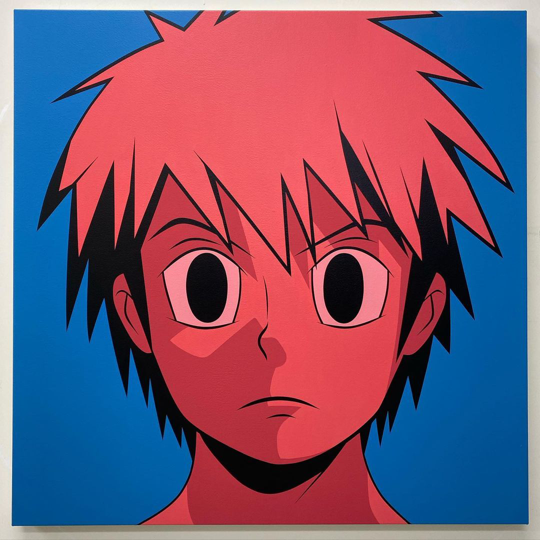

In [ ]:
img1

Cover Image

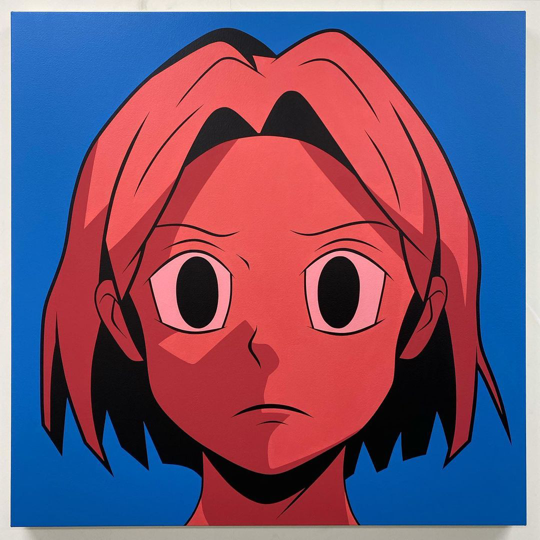

In [ ]:
img2

Image to merge

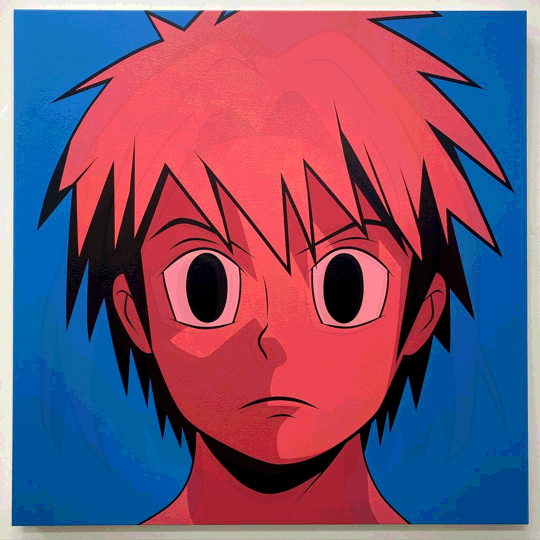

In [ ]:
img_merge

Merged Image

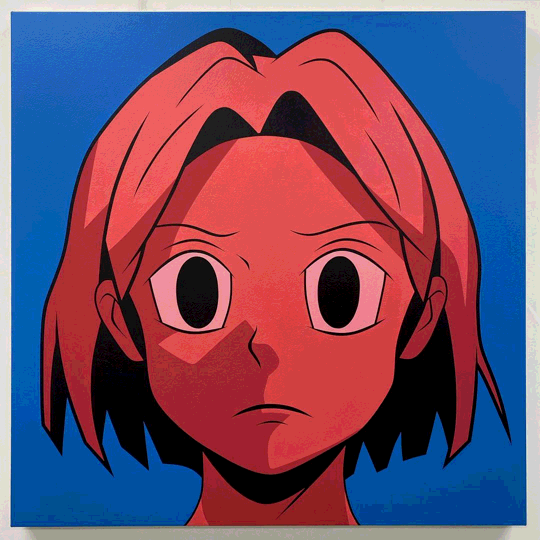

In [ ]:
img_unmerge

Unmerged Image

As you can see in the image above, we lost some image quality in the process, but this does not interfere with image comprehension.

### Reference

**Steganography: Hiding an image inside another**. (2018). Retrieved September 27, 2021, from towardsdatascience.com

website: https://towardsdatascience.com/steganography-hiding-an-image-inside-another-77ca66b2acb1

**Add watermark to multiple images with Opencv and python.**(2020) Retrieved September 27,2021, from youtube.com
website: https://www.youtube.com/watch?v=xfgtcAw-VIA

‌